In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation
import scipy as sp

In [3]:
# model = 'mapk'
# result_pd = pd.read_csv('../data/' + model + '_canalizing.csv')
# result_pd = pd.read_csv('../data/' + model + '_2_canalizing.csv')
result_pd = pd.read_csv('../data/cc_config_500.csv')

In [176]:
# apoptosis_pd = pd.read_csv('../data/' + 'apoptosis' + '_canalizing.csv')
# bortezomib_pd = pd.read_csv('../data/' + 'bortezomib' + '_canalizing.csv')
# mapk_pd = pd.read_csv('../data/' + 'mapk' + '_canalizing.csv')
# mapk2_pd = pd.read_csv('../data/' + 'mapk' + '_2_canalizing.csv')
# result_pd = pd.concat([apoptosis_pd, bortezomib_pd, mapk_pd, mapk2_pd], ignore_index=True)

In [4]:
result_pd = result_pd.drop(columns=['Unnamed: 0', 'network_idx'])

In [5]:
result_pd['type'] = 'random'

In [6]:
original_pd = pd.read_csv('../data/original.csv')
original_pd = original_pd.drop(columns=['Unnamed: 0', 'network_idx'])
original_pd['type'] = 'original'
result_pd = pd.concat([original_pd, result_pd], ignore_index=True)

In [7]:
original_pd

,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,redundancy,deterministic_io_ratio,empty_io_ratio,num_input,num_output,type
0,67,135,26,23,1,17,0.656716,0.925111,330.371429,0.583333,0.25000,5.0,3.0,original
1,41,75,37,2,0,2,0.503049,0.834270,-1.000000,0.000000,1.00000,2.0,1.0,original
2,25,74,1,0,0,24,0.580000,0.622930,19.240000,0.208333,0.50000,6.0,3.0,original
3,16,51,1,10,0,5,0.687500,0.637451,8.709091,0.687500,0.18750,5.0,2.0,original
4,70,154,55,14,0,1,0.338095,0.855845,-1.000000,0.000000,1.00000,1.0,2.0,original
5,28,48,3,12,1,12,0.375000,0.767753,16.000000,0.125000,0.62500,3.0,3.0,original
6,25,74,0,0,0,25,0.480000,0.630156,24.250000,0.031250,0.87500,6.0,4.0,original
7,16,51,3,9,0,4,0.875000,0.642456,4.600000,0.593750,0.40625,5.0,1.0,original
8,68,109,15,29,1,23,0.681373,0.905948,56.066667,0.875000,0.12500,6.0,5.0,original
9,20,52,4,13,0,3,0.675000,0.949463,1117.000000,0.500000,0.50000,1.0,1.0,original


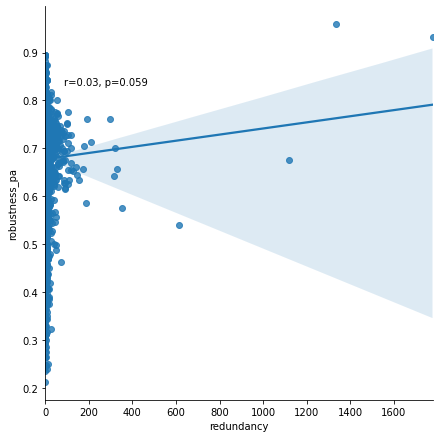

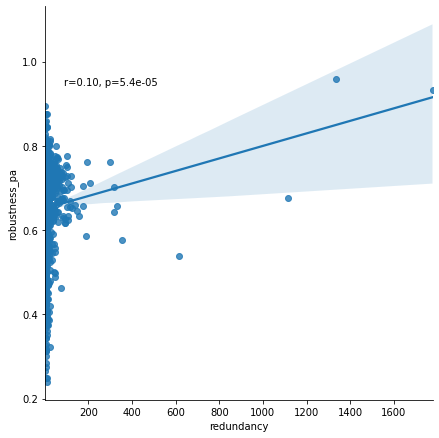

In [8]:
x_val = 'redundancy'
y_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
               #hue='type',
               height=6, aspect=1, logx=False, markers='o')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data[y_val])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()
g = sns.lmplot(x=x_val, y=y_val, data=result_pd[result_pd['redundancy'] > 0], 
               #hue='type',
               height=6, aspect=1, logx=False, markers='o')

g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()

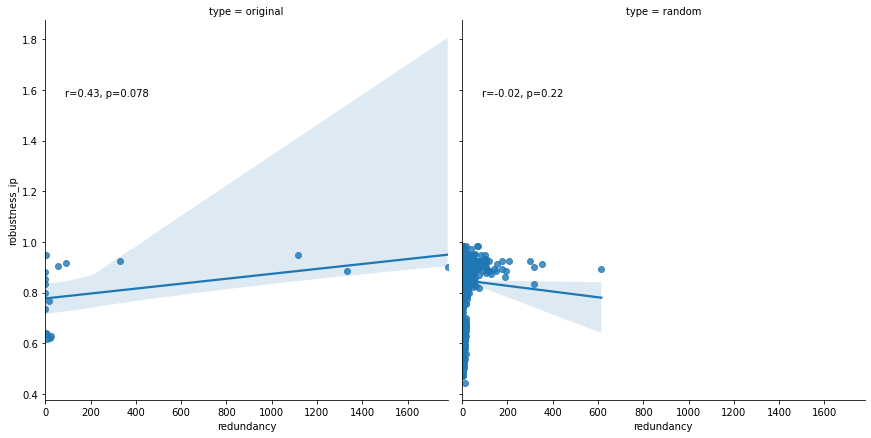

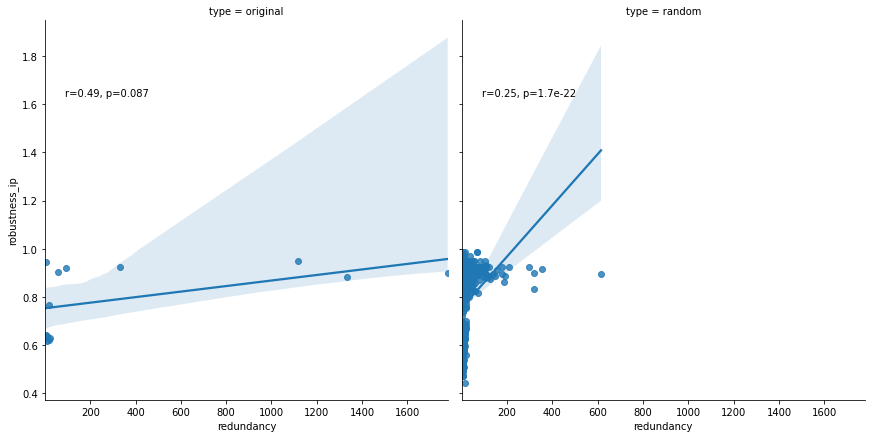

In [25]:
x_val = 'redundancy'
y_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
               col='type',
               height=6, aspect=1, logx=False, markers='o')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data[y_val])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()
g = sns.lmplot(x=x_val, y=y_val, data=result_pd[result_pd['redundancy'] > 0], 
               col='type',
               height=6, aspect=1, logx=False, markers='o')

g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()

In [11]:
result_pd

,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,redundancy,deterministic_io_ratio,empty_io_ratio,num_input,num_output,type,model
0,67,135,26,23,1,17,0.656716,0.925111,330.371429,0.583333,0.2500,5.0,3.0,original,NaN
1,41,75,37,2,0,2,0.503049,0.834270,-1.000000,0.000000,1.0000,2.0,1.0,original,NaN
2,25,74,1,0,0,24,0.580000,0.622930,19.240000,0.208333,0.5000,6.0,3.0,original,NaN
3,16,51,1,10,0,5,0.687500,0.637451,8.709091,0.687500,0.1875,5.0,2.0,original,NaN
4,70,154,55,14,0,1,0.338095,0.855845,-1.000000,0.000000,1.0000,1.0,2.0,original,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,19,30,19,0,0,0,0.789474,0.850021,-1.000000,0.000000,1.0000,1.0,1.0,random,oxidative
5014,19,30,16,3,0,0,0.710526,0.842105,-1.000000,0.000000,1.0000,1.0,1.0,random,oxidative
5015,19,30,17,2,0,0,0.736842,0.947368,-1.000000,0.000000,1.0000,1.0,1.0,random,oxidative
5016,19,30,7,12,0,0,0.568421,0.752981,-1.000000,0.000000,1.0000,1.0,1.0,random,oxidative


In [13]:
melt_pd = pd.melt(result_pd.drop('model', axis=1), id_vars=['size_of_network', 'type','num_link', 'robustness_pa', 'robustness_ip', 'redundancy', 'deterministic_io_ratio', 'empty_io_ratio', 'num_input', 'num_output'], var_name='class')
melt_pd['value'] = melt_pd['value'] / melt_pd['size_of_network']

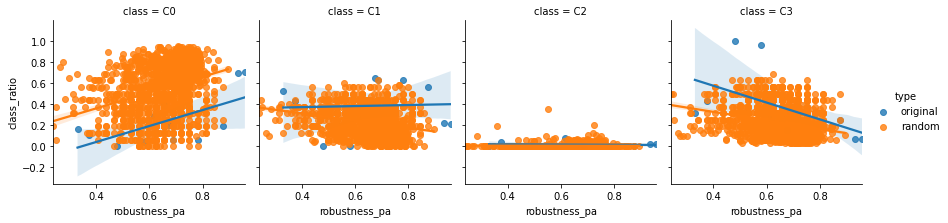

In [14]:
x_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
# g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

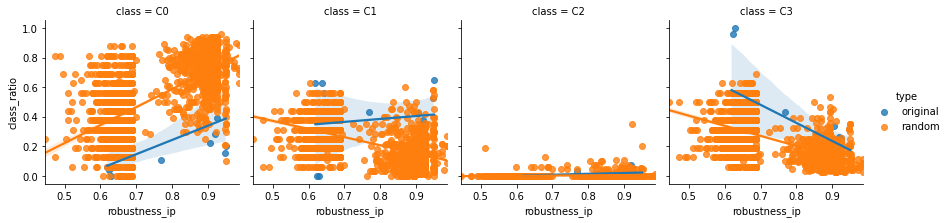

In [15]:
x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
# g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

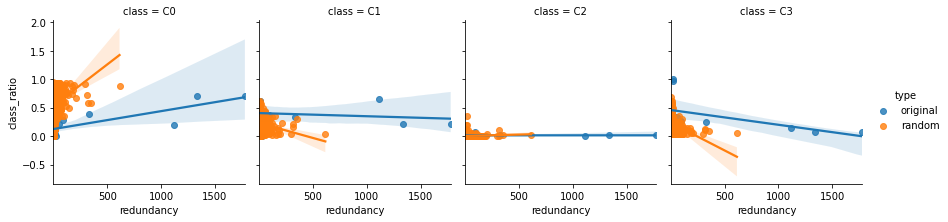

In [16]:
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
# g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

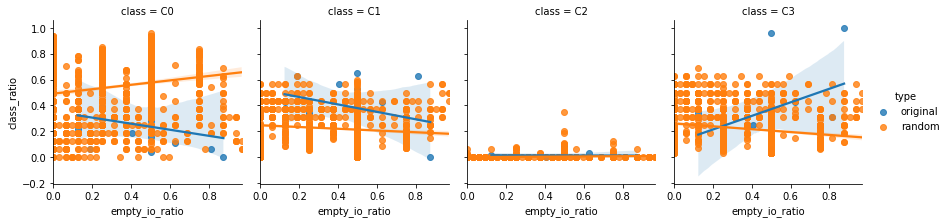

In [21]:
x_val = 'empty_io_ratio'
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
#g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

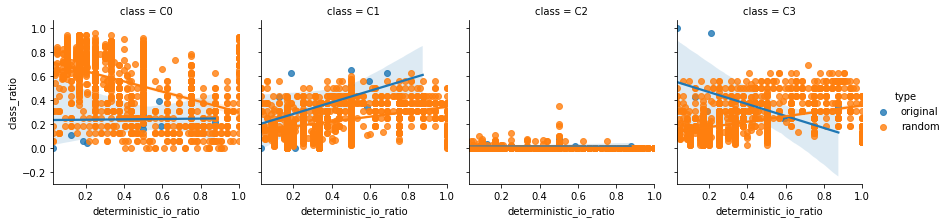

In [22]:
x_val = 'deterministic_io_ratio'
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
# g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

In [189]:
sum(result_pd['redundancy']>0)

158